In [4]:
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv("data/nrg_cb_oilm_linear.csv.gz")

In [6]:
data

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE,OBS_FLAG
0,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,BKFLOW,O4100_TOT,THS_T,AT,2008-01,0.0,NaN
1,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,BKFLOW,O4100_TOT,THS_T,AT,2008-02,0.0,NaN
2,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,BKFLOW,O4100_TOT,THS_T,AT,2008-03,0.0,NaN
3,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,BKFLOW,O4100_TOT,THS_T,AT,2008-04,0.0,NaN
4,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,BKFLOW,O4100_TOT,THS_T,AT,2008-05,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
2236729,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,TO_RPI_RO,R5230B,THS_T,TR,2023-01,0.0,NaN
2236730,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,TO_RPI_RO,R5230B,THS_T,TR,2023-02,0.0,NaN
2236731,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,TO_RPI_RO,R5230B,THS_T,TR,2023-03,0.0,NaN
2236732,ESTAT:NRG_CB_OILM(1.0),30/08/23 23:00:00,M,TO_RPI_RO,R5230B,THS_T,TR,2023-04,0.0,NaN


In [7]:
gbc = data.groupby("geo")

In [8]:
for i, k in gbc: 
    print(i, len(k))

AL 24686
AT 67963
BE 68912
BG 67753
CY 66245
CZ 68208
DE 69712
DK 67350
EE 65299
EL 69761
ES 68833
EU27_2020 69810
FI 68410
FR 69598
GE 14021
HR 67488
HU 68711
IE 67242
IS 24552
IT 68911
LT 67533
LU 65775
LV 66475
MD 14282
ME 461
MK 48865
MT 62558
NL 70857
NO 68274
PL 63848
PT 68540
RO 67680
RS 19140
SE 71279
SI 66376
SK 68053
TR 67610
UK 55663


In [9]:
at = gbc.get_group("AT")

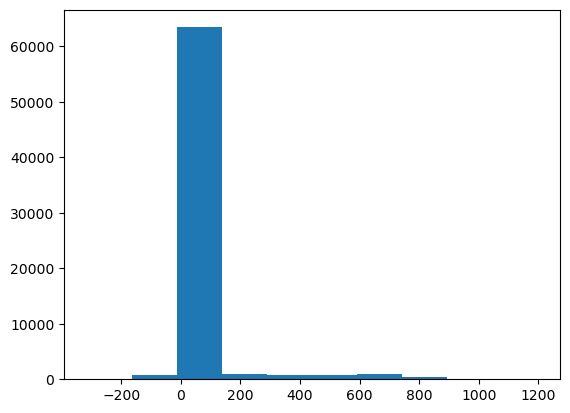

In [10]:
plt.hist(at.OBS_VALUE)
plt.show()

In [11]:
at.nrg_bal.value_counts()

nrg_bal
STK_CHG                5037
IMP                    4856
EXP                    4708
GID_OBS                4336
TO_RPI_RO              4065
PT                     3993
GID_CAL                3978
PPR                    3969
IT                     3954
GD_PI                  3915
BKFLOW                 3730
RF                     3721
INTMARB                3546
RCV_RCY                3546
TI_EHG_MAP             3450
RI_OBS                 1198
DU                     1138
RL                     1112
STATDIFF                918
IPRD                    804
INTAVI_E                712
TOS                     658
RI_CAL                  290
FC_TRA_ROAD_E           160
FC_TRA_RAIL_DNAVI_E     124
ND_TP                    45
Name: count, dtype: int64

In [12]:
gb_nrgbal = at.groupby("nrg_bal")

BKFLOW


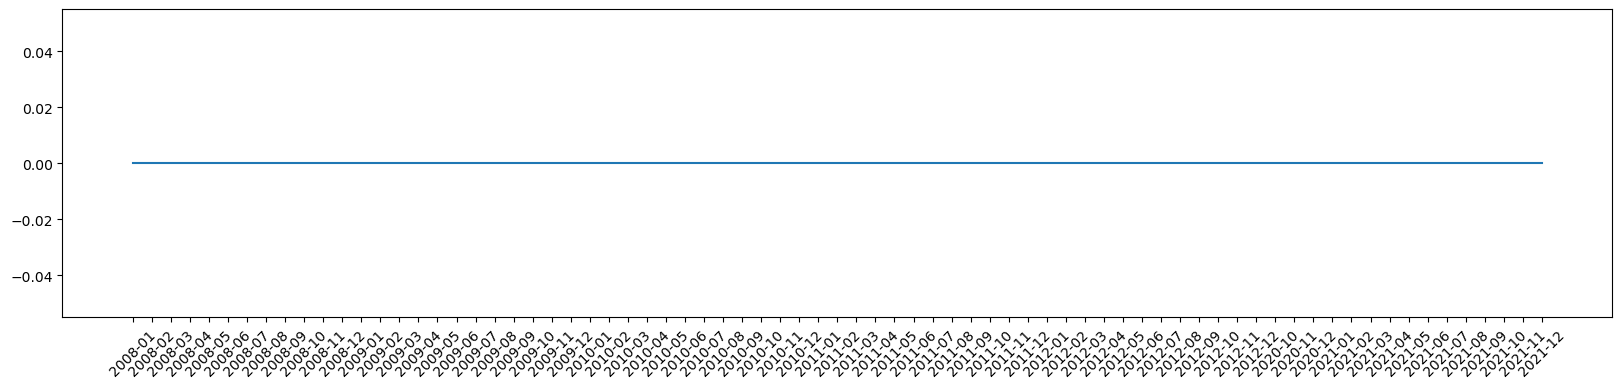

DU


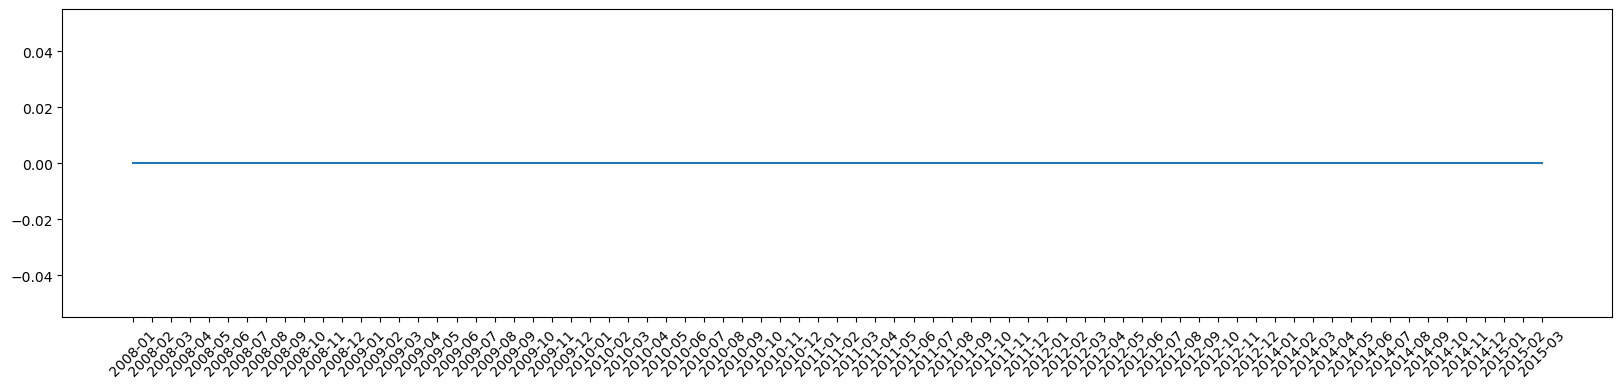

EXP


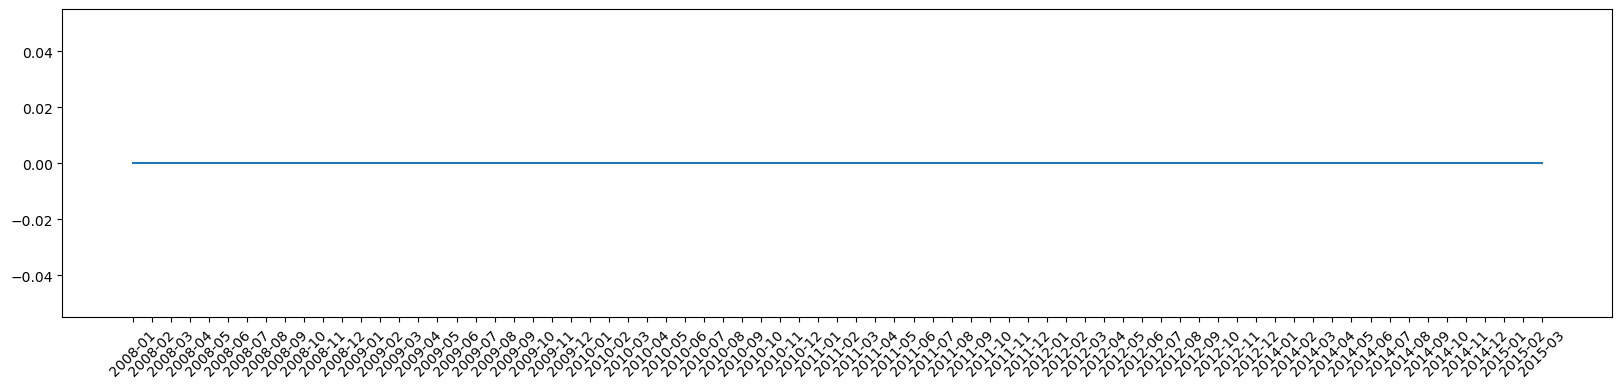

FC_TRA_RAIL_DNAVI_E


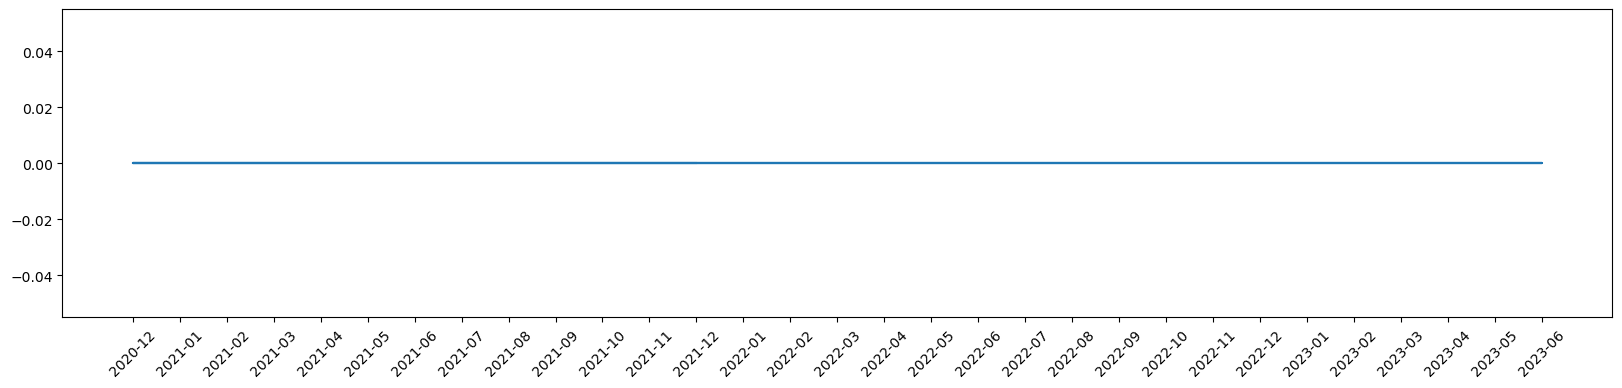

FC_TRA_ROAD_E


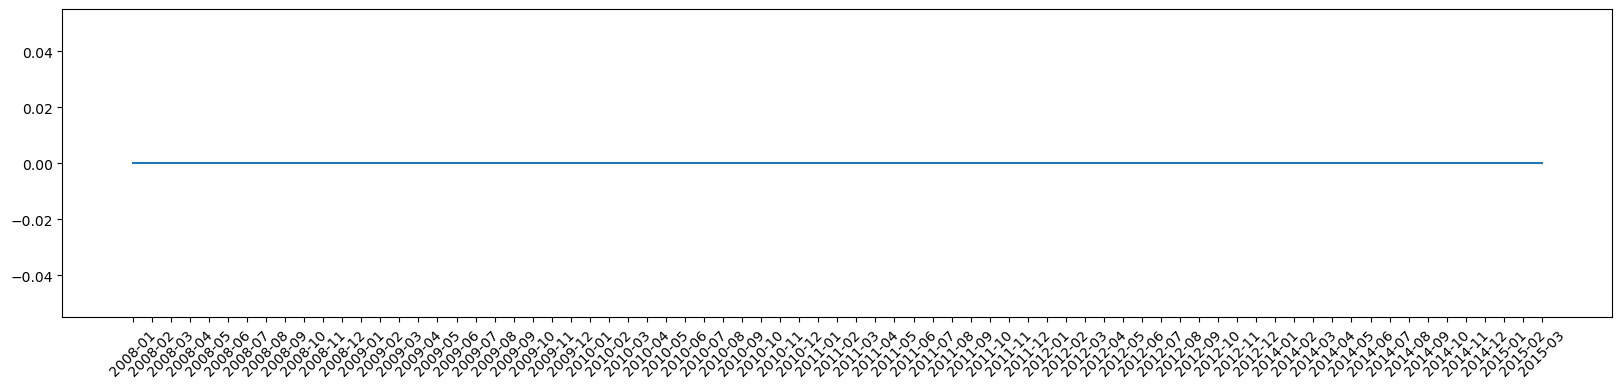

GD_PI


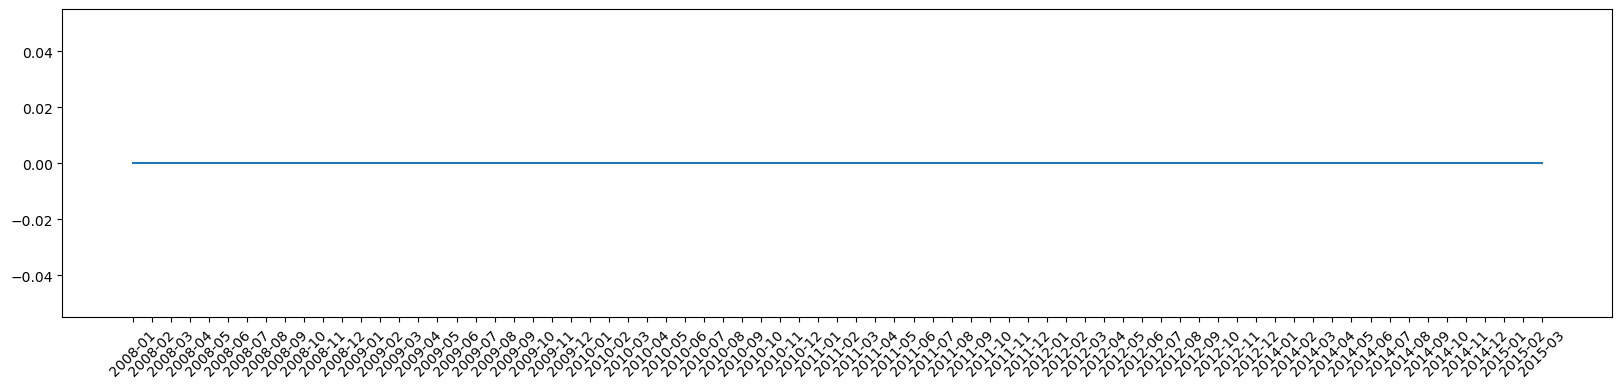

GID_CAL


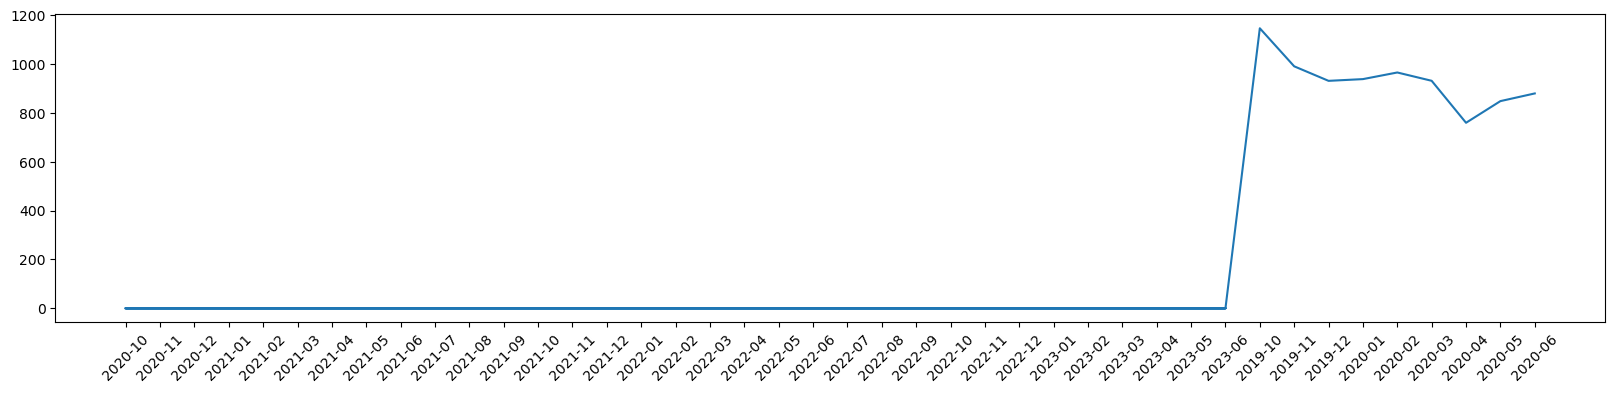

GID_OBS


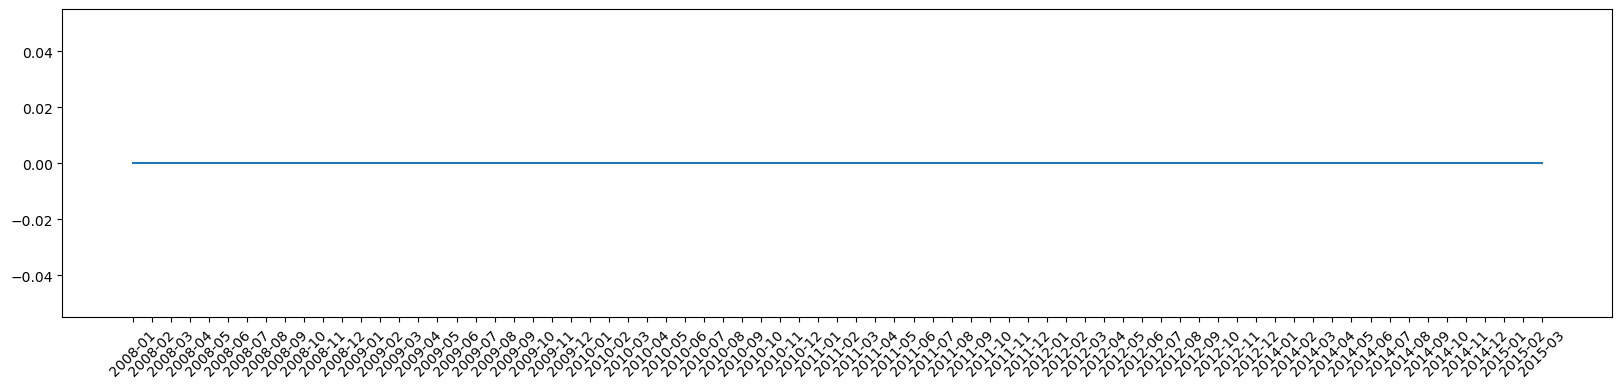

IMP


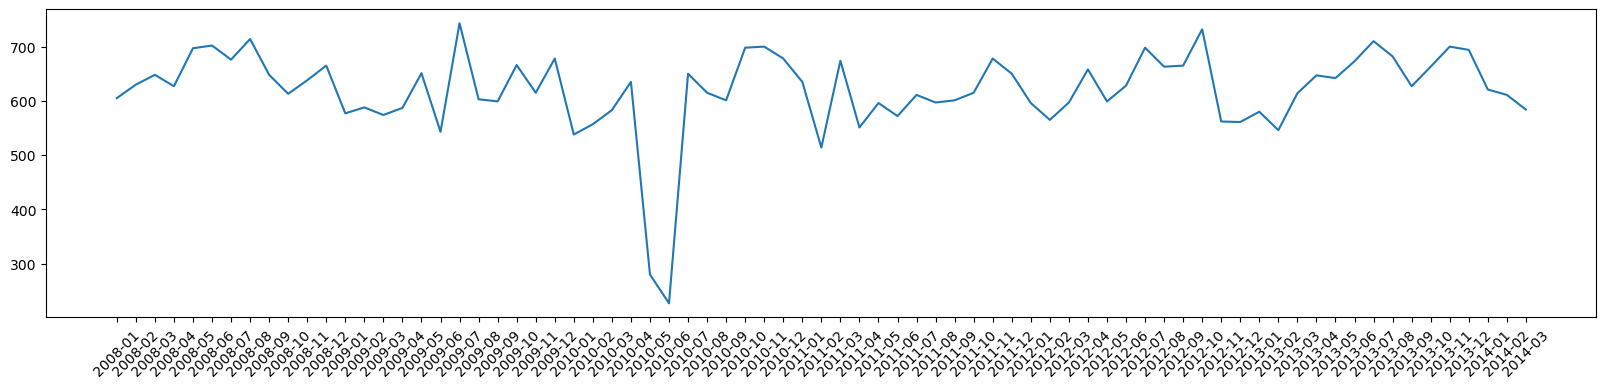

INTAVI_E


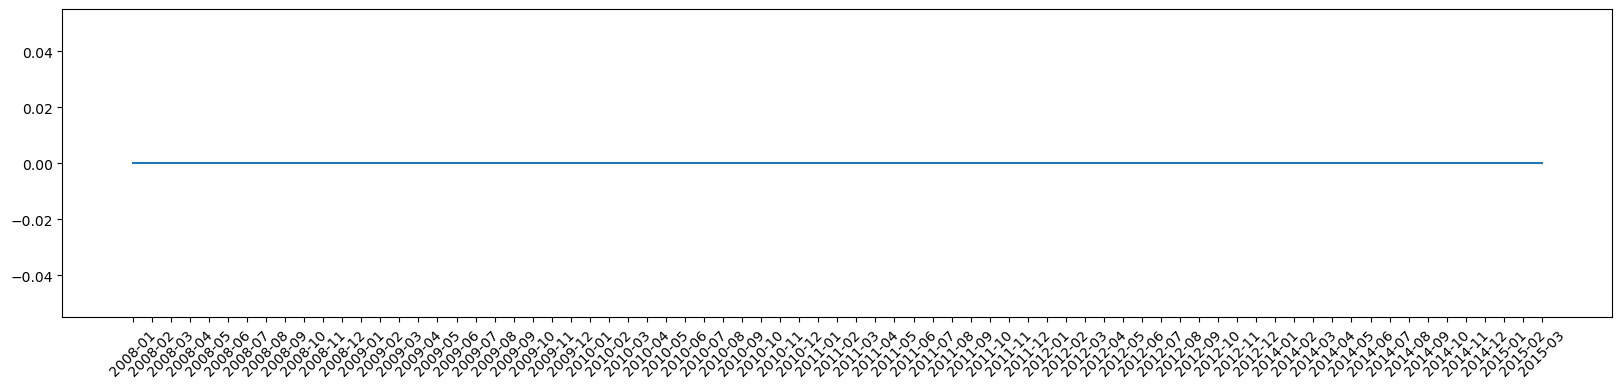

INTMARB


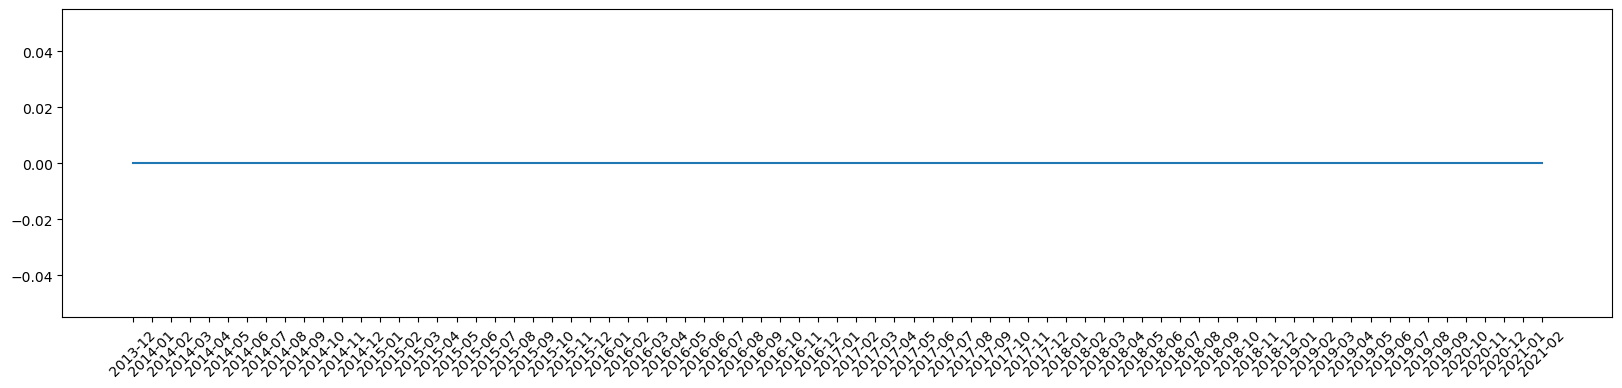

IPRD


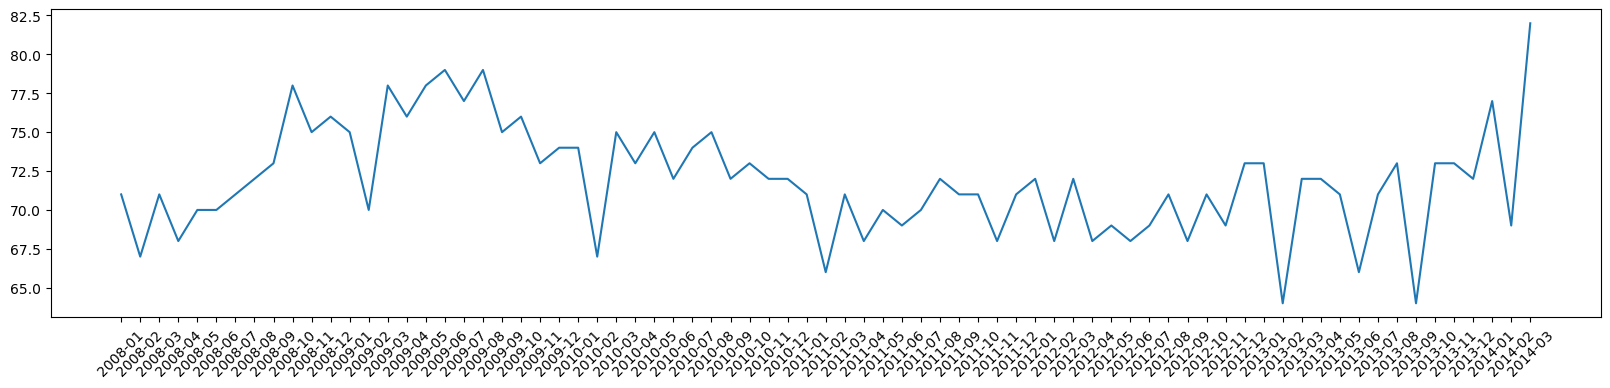

IT


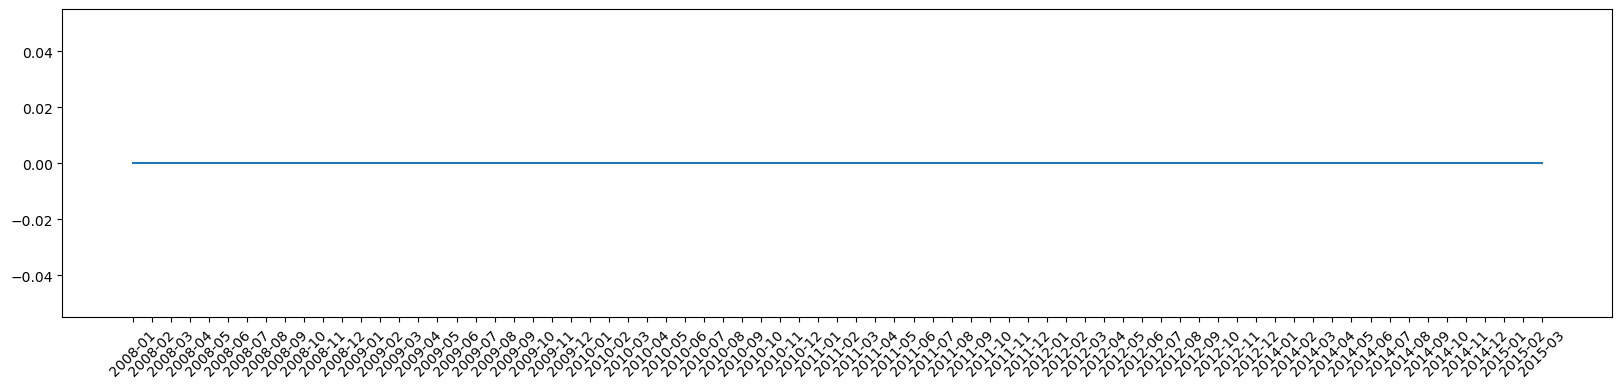

ND_TP


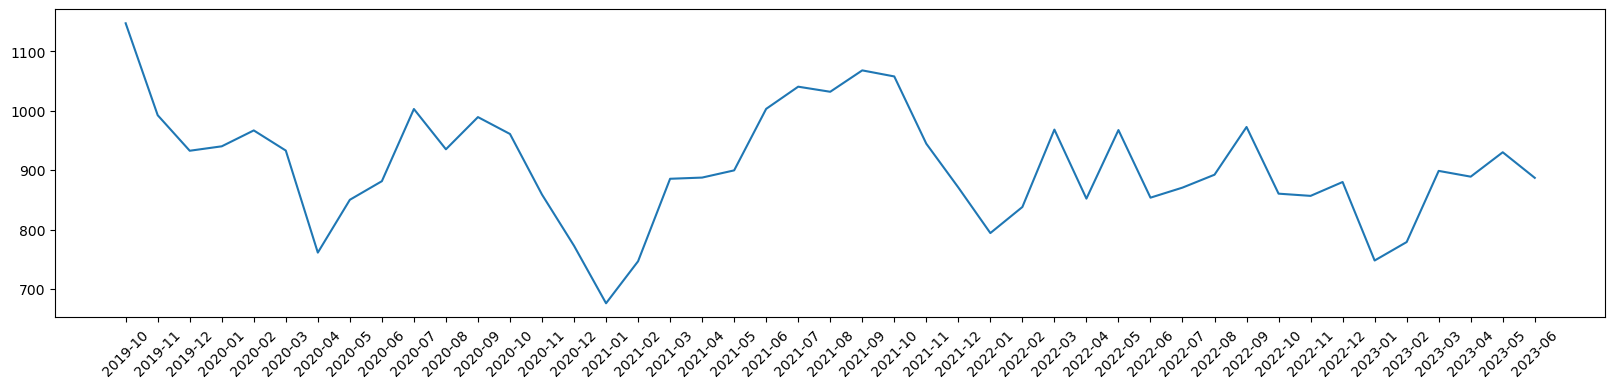

PPR


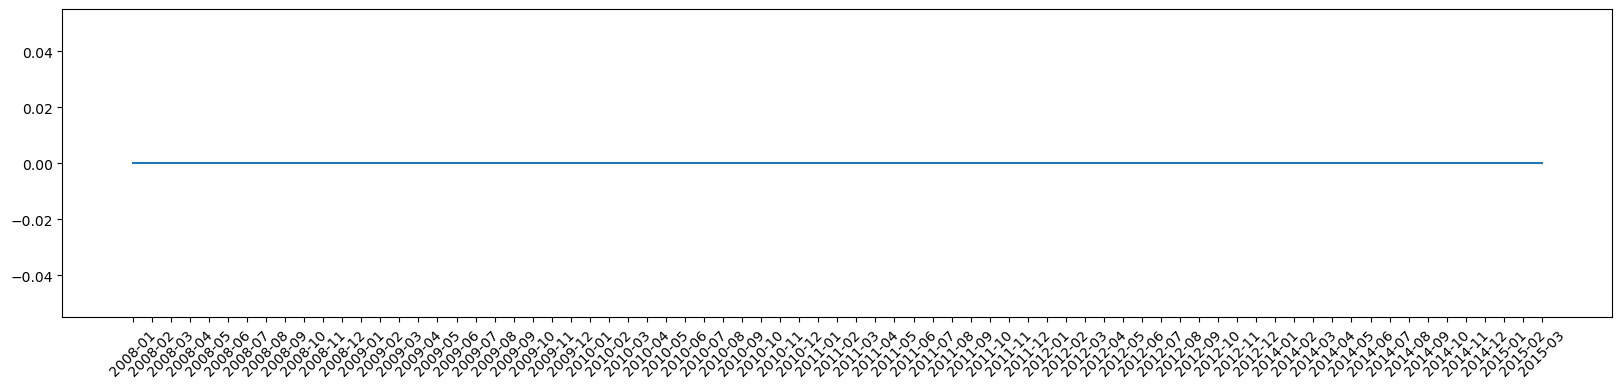

PT


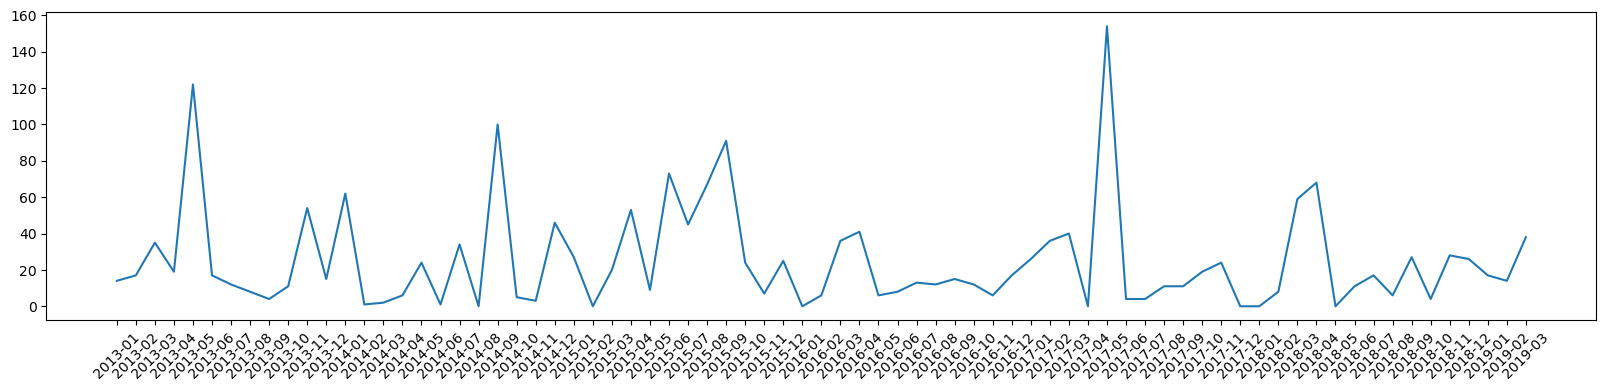

RCV_RCY


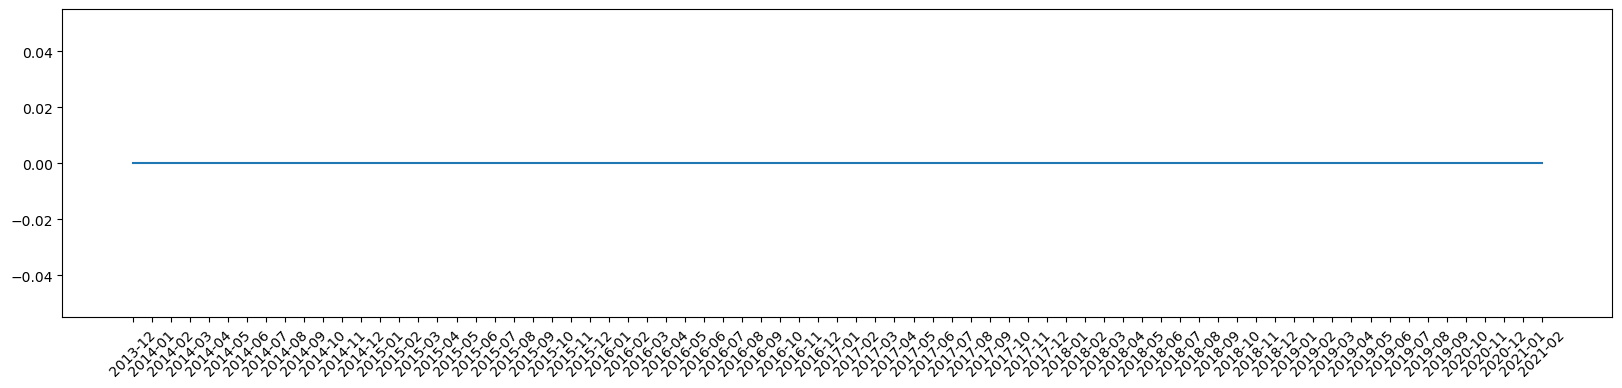

RF


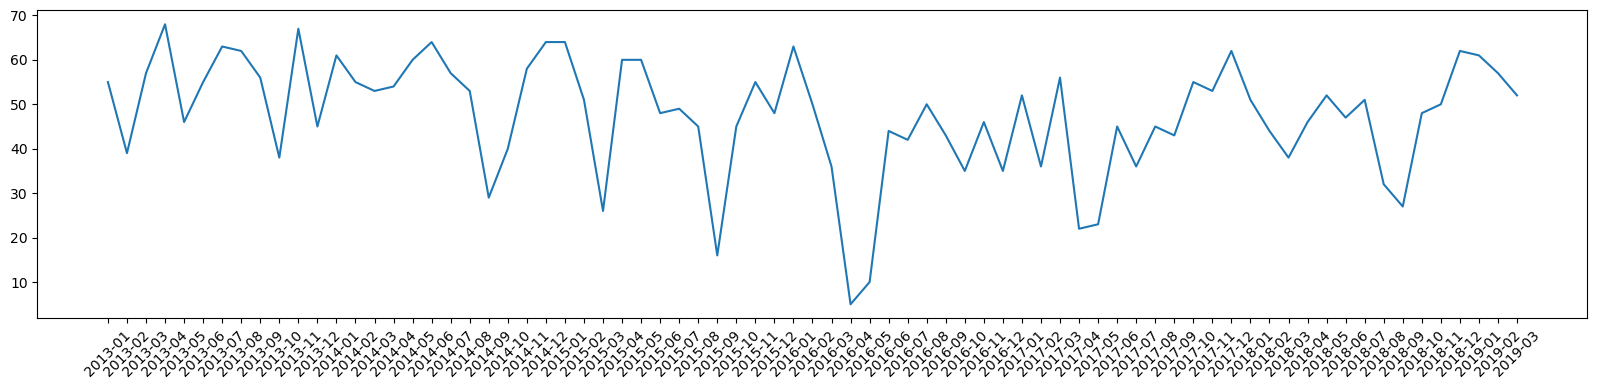

RI_CAL


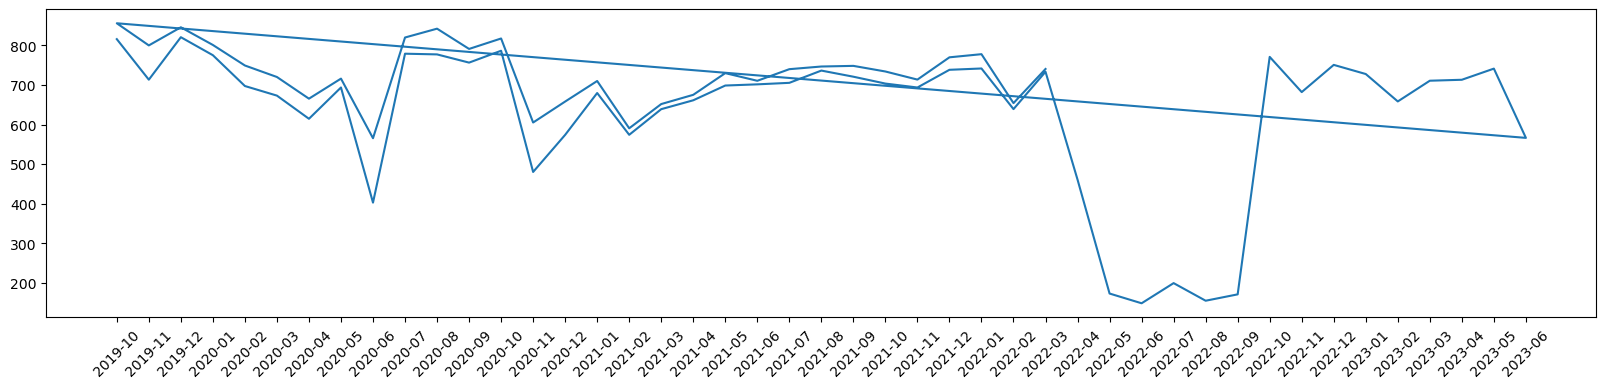

RI_OBS


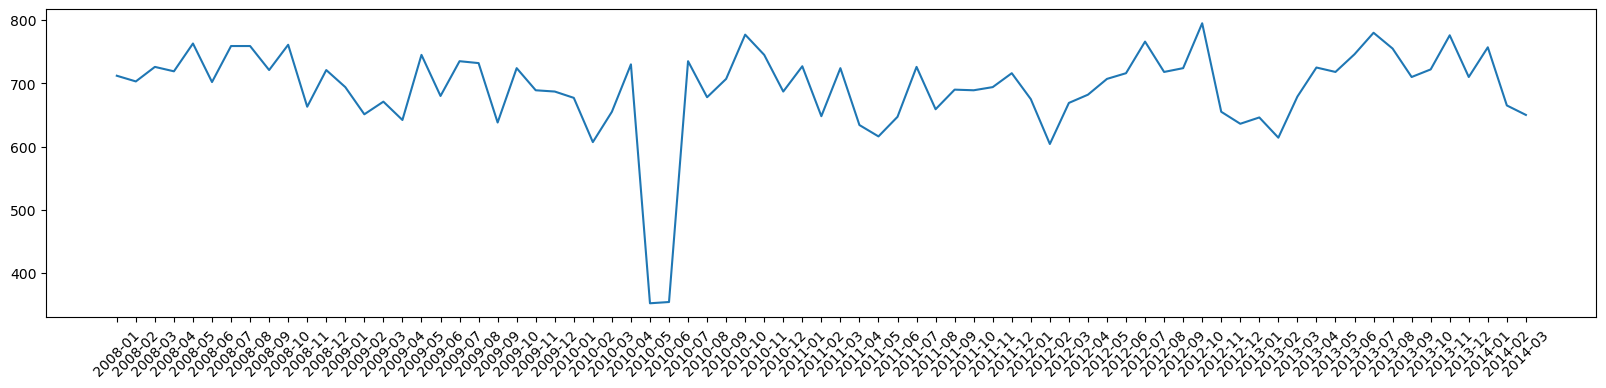

RL


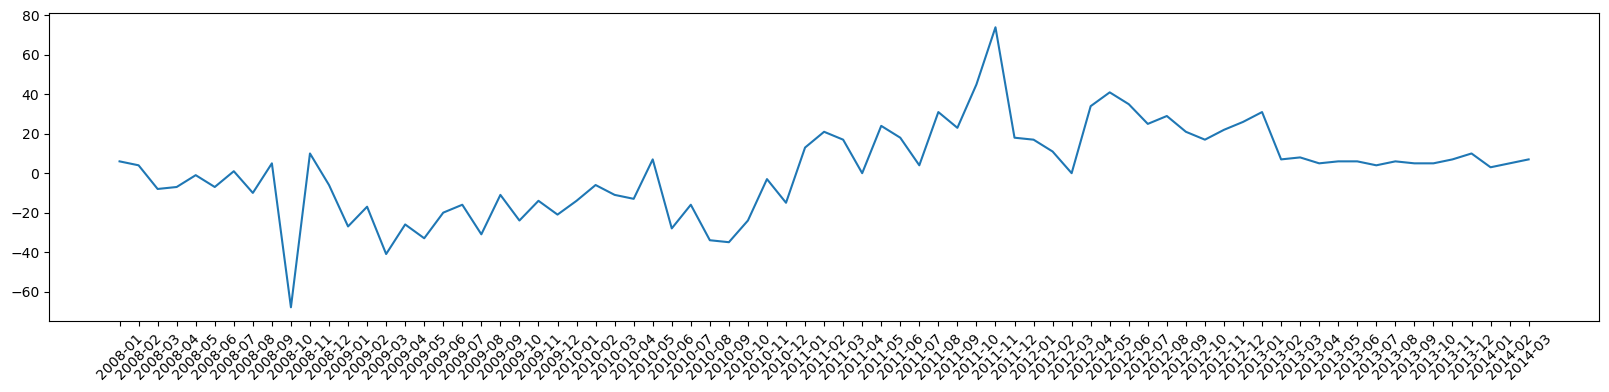

STATDIFF


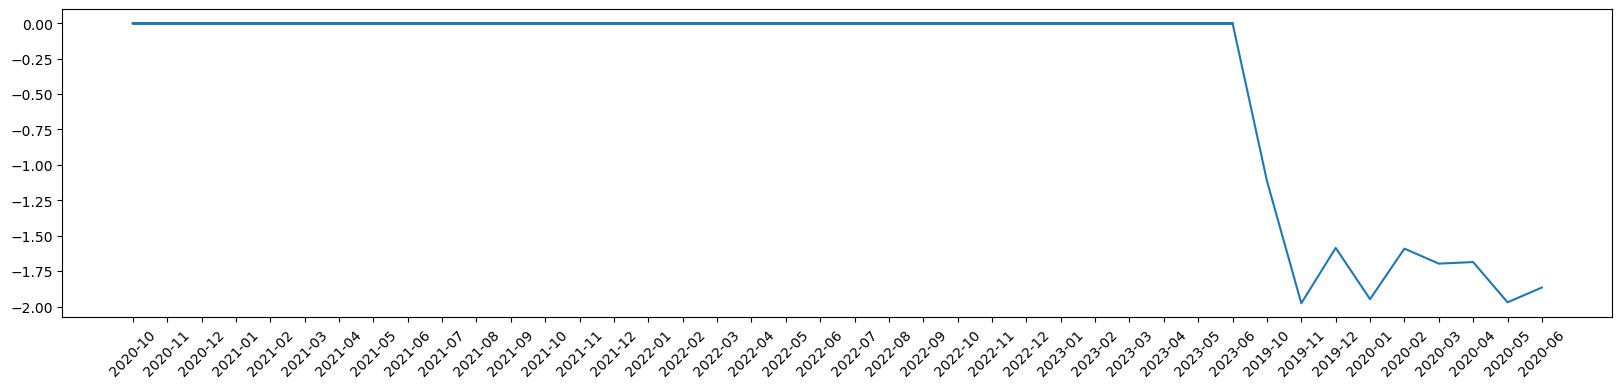

STK_CHG


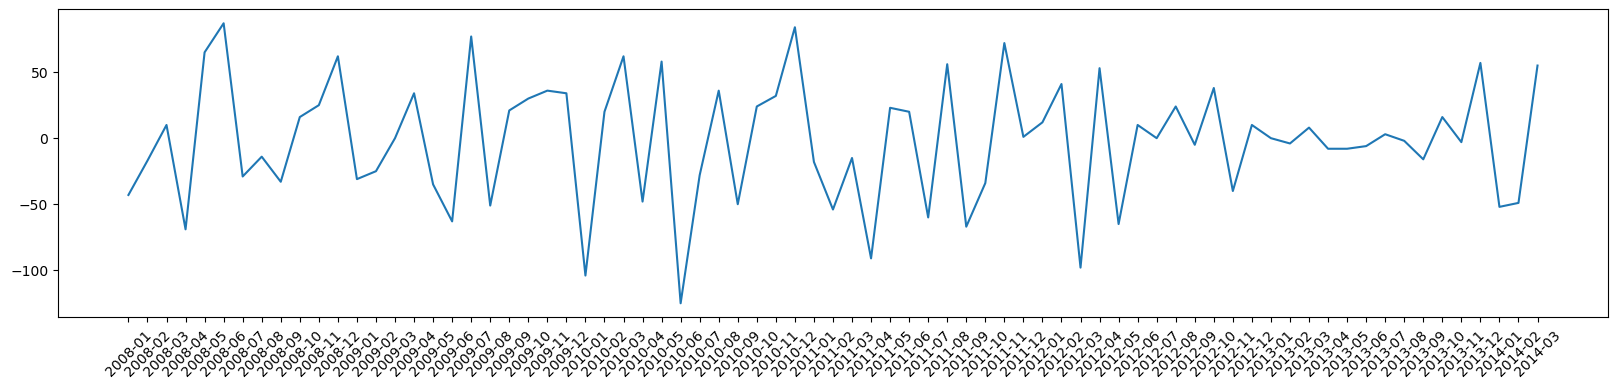

TI_EHG_MAP


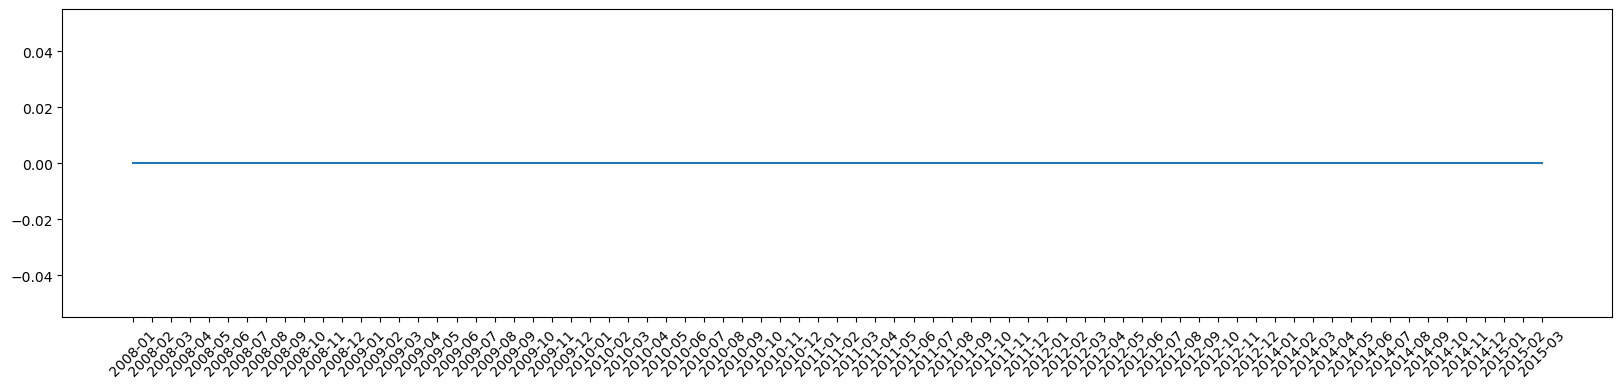

TOS


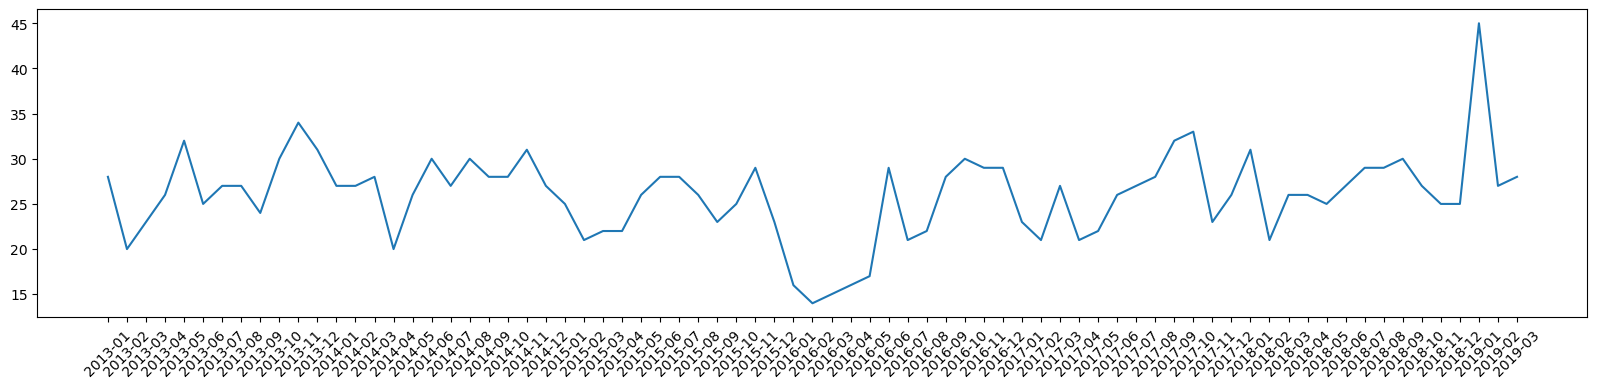

TO_RPI_RO


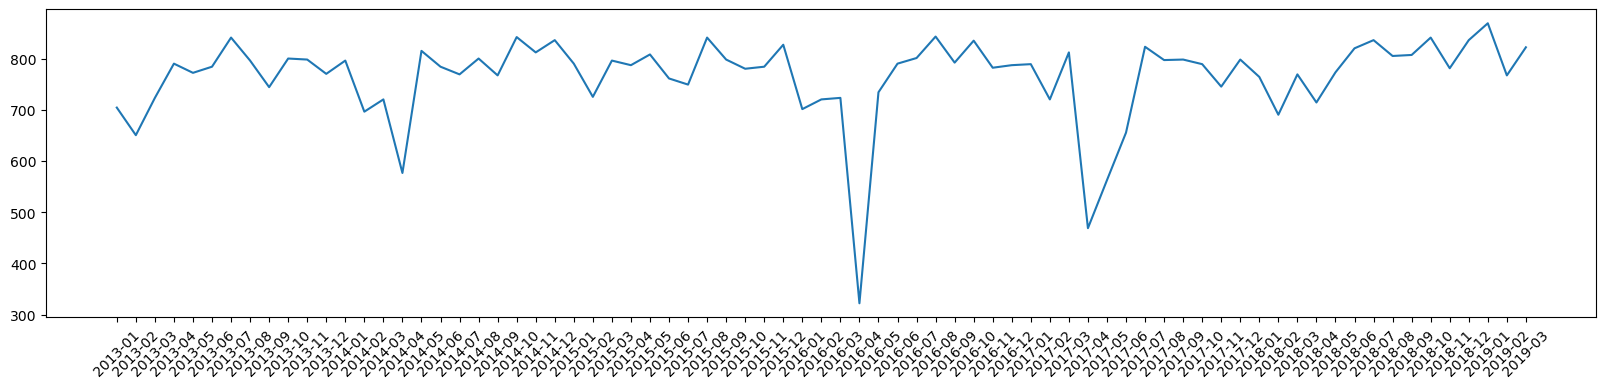

In [13]:
for i, k in gb_nrgbal: 
    print(i)
    timeseries = k[["TIME_PERIOD","OBS_VALUE"]].set_index("TIME_PERIOD")[:75]
    plt.figure(figsize = (20, 4))
    plt.plot(timeseries)
    plt.xticks(rotation = 45)
    plt.show()